In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/SEE_AI_project_all_images.zip'

# Destination folder for extracted files
extract_to_path = '/content/drive/MyDrive/'

# Create the destination directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted successfully to {extract_to_path}")


Files extracted successfully to /content/drive/MyDrive/


In [ ]:
csv_path = '/content/drive/MyDrive/all_annotation.csv'

In [ ]:
# Load the CSV file
import pandas as pd
annotations = pd.read_csv(csv_path)

In [ ]:
annotations.columns


Index(['annotation_class_name', 'image_number', 'angiodysplasia', 'erosion',
       'stenosis', 'lymphangiectasia', 'lymph follicle', 'SMT', 'polyp-like',
       'bleeding', 'diverticulum', 'erythema', 'foreign body', 'vein'],
      dtype='object')

In [ ]:
annotations = annotations.drop(columns=['annotation_number'])

In [ ]:
output_path = '/content/drive/MyDrive/Organized_images'

In [ ]:
# Step 1: Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

In [ ]:
# Step 3: Extract class names starting from the 2nd index (after 'image_number')
class_names = annotations.columns[2:]  # Class names start from index 2
print(f"Class Names: {list(class_names)}")  # Print class names for reference

# Step 4: Create folders for each class
for class_name in class_names:
    os.makedirs(os.path.join(output_path, class_name), exist_ok=True)

Class Names: ['angiodysplasia', 'erosion', 'stenosis', 'lymphangiectasia', 'lymph follicle', 'SMT', 'polyp-like', 'bleeding', 'diverticulum', 'erythema', 'foreign body', 'vein']


In [ ]:
class_names

Index(['angiodysplasia', 'erosion', 'stenosis', 'lymphangiectasia',
       'lymph follicle', 'SMT', 'polyp-like', 'bleeding', 'diverticulum',
       'erythema', 'foreign body', 'vein'],
      dtype='object')

In [ ]:
image_path = '/content/drive/MyDrive/SEE_AI_project_all_images'

In [ ]:
import os
import pandas as pd
import shutil


# Step 5: Iterate through each row in the CSV
for _, row in annotations.iterrows():
    # Skip rows where 'image_number' is NaN or blank
    if pd.isna(row['image_number']):
        continue  # Skip this row

    # Safely convert the image number to an integer
    try:
        image_number = int(row['image_number'])  # Get the image number
        image_name = f"image{image_number:05d}.jpg"  # Format the image filename
        image_full_path = os.path.join(image_path, image_name)  # Full path to the image

        # Check if the image exists
        if os.path.exists(image_full_path):
            # Check each class column for annotations (value >= 1)
            for class_name in class_names:
                if row[class_name] >= 1:  # If the class column value is >= 1
                    class_folder = os.path.join(output_path, class_name)  # Get the class folder path
                    shutil.copy(image_full_path, class_folder)  # Copy the image to the class folder
                    print(f"Copied {image_name} to {class_folder}")
        else:
            print(f"Image not found: {image_full_path}")
    except ValueError:
        print(f"Invalid image number: {row['image_number']}. Skipping...")

print("Images have been successfully organized into class folders.")

Streaming output truncated to the last 5000 lines.
Copied image11812.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11812.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11813.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11814.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11815.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11815.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11816.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11816.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11817.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11817.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11818.jpg to /content/drive/MyDrive/Organized_images/erosion
Copied image11819.jpg to /content/drive/MyDrive/Organized_images/bleeding
Copied image11820.jpg to /content/drive/MyDrive/Organized_images/bl

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/All_Organized_images.zip'

# Destination folder for extracted files
extract_to_path = '/content/drive/MyDrive/'

# Create the destination directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted successfully to {extract_to_path}")


Files extracted successfully to /content/drive/MyDrive/


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_dir = '/content/drive/MyDrive/All_Organized_images'
train_dir = '/content/drive/MyDrive/Train_CE'
val_dir = '/content/drive/MyDrive/Val_CE'
test_dir = '/content/drive/MyDrive/Test_CE'

# Create directories for splits
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Split dataset
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        # Create class directories in the split folders
        train_class_dir = os.path.join(train_dir, class_folder)
        val_class_dir = os.path.join(val_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Get list of images
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]

        # Split images
        train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

        # Copy images to their respective folders
        for img in train_imgs:
            shutil.copy(img, train_class_dir)
        for img in val_imgs:
            shutil.copy(img, val_class_dir)
        for img in test_imgs:
            shutil.copy(img, test_class_dir)

print("Dataset split successfully!")


Dataset split successfully!


In [ ]:
import os
from PIL import Image
import numpy as np

def preprocess_images(input_dir, output_dir, target_size=(224, 224)):
    """
    Resizes and normalizes images to the range [0, 1].
    """
    os.makedirs(output_dir, exist_ok=True)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        output_class_path = os.path.join(output_dir, class_folder)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            with Image.open(img_path) as img:
                # Resize image
                img = img.resize(target_size)

                # Convert to NumPy array and normalize
                img_array = np.array(img).astype('float32') / 255.0  # Scale pixel values to [0, 1]

                # Convert back to image for saving
                img = Image.fromarray((img_array * 255).astype('uint8'))

                # Save the preprocessed image
                img.save(os.path.join(output_class_path, img_name))

# Paths to datasets
train_dir = '/content/drive/MyDrive/Train_CE'
val_dir = '/content/drive/MyDrive/Val_CE'
test_dir = '/content/drive/MyDrive/Test_CE'

# Output paths for preprocessed datasets
preprocessed_train_dir = '/content/drive/MyDrive/Preprocessed_Train_CE'
preprocessed_val_dir = '/content/drive/MyDrive/Preprocessed_Val_CE'
preprocessed_test_dir = '/content/drive/MyDrive/Preprocessed_Test_CE'

# Preprocess training, validation, and test datasets
preprocess_images(train_dir, preprocessed_train_dir, target_size=(224, 224))
preprocess_images(val_dir, preprocessed_val_dir, target_size=(224, 224))
preprocess_images(test_dir, preprocessed_test_dir, target_size=(224, 224))

print("All datasets have been resized and normalized successfully.")


All datasets have been resized and normalized successfully.


In [ ]:
preprocessed_train_dir = '/content/drive/MyDrive/Preprocessed_Train_CE'
preprocessed_val_dir = '/content/drive/MyDrive/Preprocessed_Val_CE'
preprocessed_test_dir = '/content/drive/MyDrive/Preprocessed_Test_CE'

In [ ]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
from tqdm import tqdm

# Directories for preprocessed data
train_dir = '/content/drive/MyDrive/Preprocessed_Train_CE'
val_dir = '/content/drive/MyDrive/Preprocessed_Val_CE'
test_dir = '/content/drive/MyDrive/Preprocessed_Test_CE'

# Hyperparameters
batch_size = 32
learning_rate = 1e-4
num_epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained ViT model
model = models.vit_b_16(pretrained=True)
model.heads = nn.Sequential(
    nn.Linear(model.heads.head.in_features, len(train_dataset.classes))
)
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Training and validation loop
def train_and_validate(model, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = correct_train / total_train

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_accuracy = correct_val / total_val

        # Print epoch statistics
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Training Loss: {train_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.4f}")
        print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Start training
train_and_validate(model, train_loader, val_loader, num_epochs)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 218MB/s]
Epoch 1/10 - Validation: 100%|██████████| 272/272 [00:53<00:00,  5.11it/s]


Epoch 1/10
Training Loss: 0.4733, Training Accuracy: 0.8506
Validation Loss: 0.2918, Validation Accuracy: 0.9011


Epoch 2/10 - Validation: 100%|██████████| 272/272 [00:50<00:00,  5.39it/s]


Epoch 2/10
Training Loss: 0.2543, Training Accuracy: 0.9157
Validation Loss: 0.2722, Validation Accuracy: 0.9157


Epoch 3/10 - Validation: 100%|██████████| 272/272 [00:51<00:00,  5.28it/s]


Epoch 3/10
Training Loss: 0.1932, Training Accuracy: 0.9339
Validation Loss: 0.2809, Validation Accuracy: 0.9104


Epoch 4/10 - Validation: 100%|██████████| 272/272 [00:51<00:00,  5.30it/s]


Epoch 4/10
Training Loss: 0.1599, Training Accuracy: 0.9447
Validation Loss: 0.2925, Validation Accuracy: 0.9033


Epoch 5/10 - Validation: 100%|██████████| 272/272 [00:51<00:00,  5.33it/s]


Epoch 5/10
Training Loss: 0.1376, Training Accuracy: 0.9522
Validation Loss: 0.2619, Validation Accuracy: 0.9193


Epoch 6/10 - Validation: 100%|██████████| 272/272 [00:51<00:00,  5.32it/s]


Epoch 6/10
Training Loss: 0.1202, Training Accuracy: 0.9578
Validation Loss: 0.2541, Validation Accuracy: 0.9191


Epoch 7/10 - Validation: 100%|██████████| 272/272 [00:50<00:00,  5.37it/s]


Epoch 7/10
Training Loss: 0.1132, Training Accuracy: 0.9596
Validation Loss: 0.2701, Validation Accuracy: 0.9138


Epoch 8/10 - Validation: 100%|██████████| 272/272 [00:49<00:00,  5.49it/s]


Epoch 8/10
Training Loss: 0.0978, Training Accuracy: 0.9638
Validation Loss: 0.2821, Validation Accuracy: 0.9136


Epoch 9/10 - Validation: 100%|██████████| 272/272 [00:50<00:00,  5.38it/s]


Epoch 9/10
Training Loss: 0.0963, Training Accuracy: 0.9644
Validation Loss: 0.2808, Validation Accuracy: 0.9173


Epoch 10/10 - Validation: 100%|██████████| 272/272 [00:53<00:00,  5.12it/s]

Epoch 10/10
Training Loss: 0.0877, Training Accuracy: 0.9668
Validation Loss: 0.2810, Validation Accuracy: 0.9203


In [ ]:
def evaluate_test_accuracy(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0
    test_loss = 0.0

    with torch.no_grad():  # No gradient computation required
        for images, labels in tqdm(test_loader, desc="Evaluating Test Accuracy"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)  # Get predictions
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_accuracy = correct_test / total_test
    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

# Evaluate on the test set
test_accuracy = evaluate_test_accuracy(model, test_loader)


Evaluating Test Accuracy: 100%|██████████| 273/273 [00:52<00:00,  5.23it/s]

Test Loss: 0.2784
Test Accuracy: 0.9220


Calculating AUC-ROC: 100%|██████████| 273/273 [00:51<00:00,  5.30it/s]


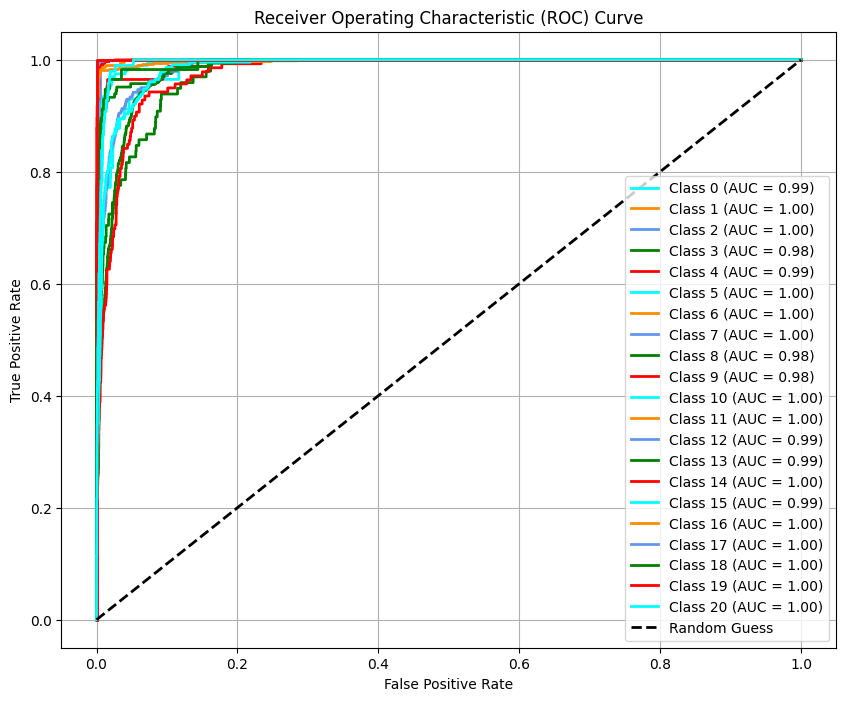

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_auc_roc(model, test_loader, num_classes):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_probs = []

    # Gather predictions and true labels
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Calculating AUC-ROC"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = nn.functional.softmax(outputs, dim=1)  # Convert logits to probabilities

            all_labels.append(labels.cpu().numpy())
            all_probs.append(probs.cpu().numpy())

    all_labels = np.concatenate(all_labels)
    all_probs = np.concatenate(all_probs)

    # Compute ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels == i, all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Number of classes
num_classes = len(train_dataset.classes)

# Plot AUC-ROC curve
plot_auc_roc(model, test_loader, num_classes)


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, test_loader, class_names):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    # Gather predictions and true labels
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Generating Classification Report"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # Get the class predictions

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names)
    print(report)

# Class names (from the dataset)
class_names = train_dataset.classes

# Generate and print classification report
generate_classification_report(model, test_loader, class_names)


Generating Classification Report: 100%|██████████| 273/273 [00:51<00:00,  5.34it/s]

                      precision    recall  f1-score   support

                 SMT       0.49      0.58      0.53        57
    ampulla_of_vater       1.00      0.50      0.67         2
         angiectasia       0.96      0.98      0.97       130
      angiodysplasia       0.58      0.45      0.51        98
            bleeding       0.82      0.71      0.76        85
         blood_fresh       0.97      1.00      0.99        67
       blood_hematin       1.00      0.50      0.67         2
        diverticulum       1.00      0.50      0.67         2
             erosion       0.69      0.68      0.69       565
            erythema       0.45      0.52      0.48       139
        foreign body       0.84      0.80      0.82       198
     ileocecal_valve       0.98      0.97      0.97       629
      lymph follicle       0.75      0.63      0.69       241
    lymphangiectasia       0.88      0.85      0.86       164
 normal_clean_mucosa       0.99      1.00      0.99      5151
       

Generating Confusion Matrix: 100%|██████████| 273/273 [00:54<00:00,  5.05it/s]


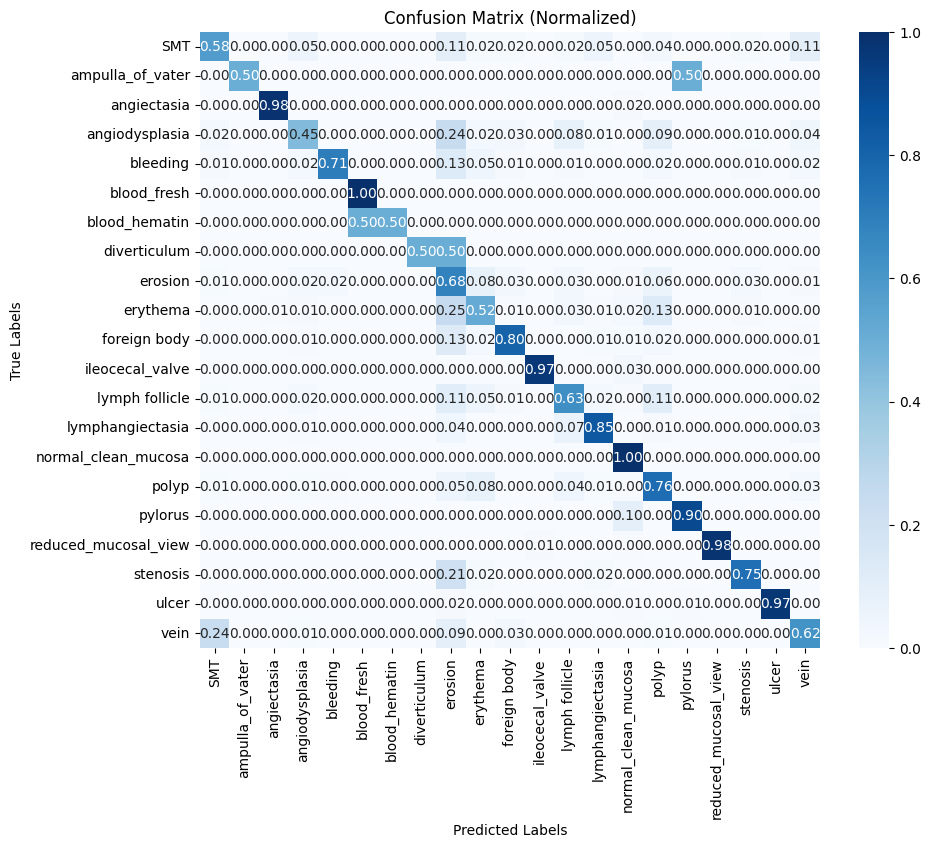

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, test_loader, class_names):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Generating Confusion Matrix"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    # Plot using Seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Normalized)')
    plt.show()

# Class names (from dataset)
class_names = train_dataset.classes

# Plot confusion matrix
plot_confusion_matrix(model, test_loader, class_names)


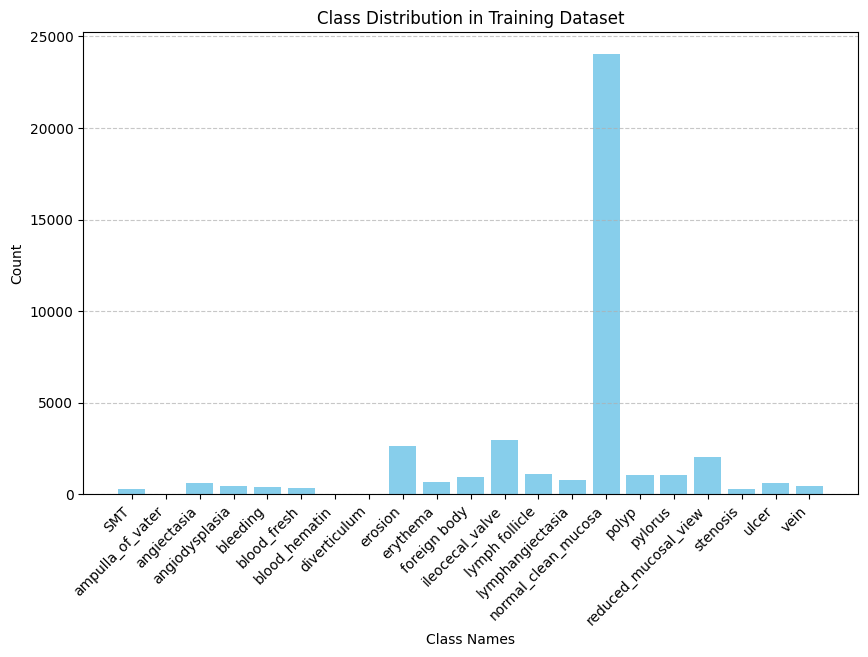

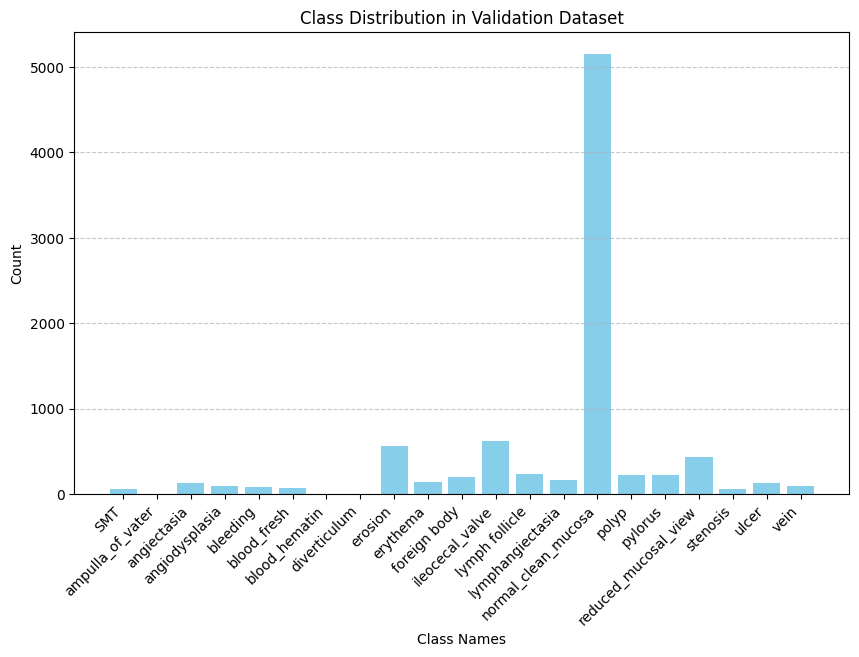

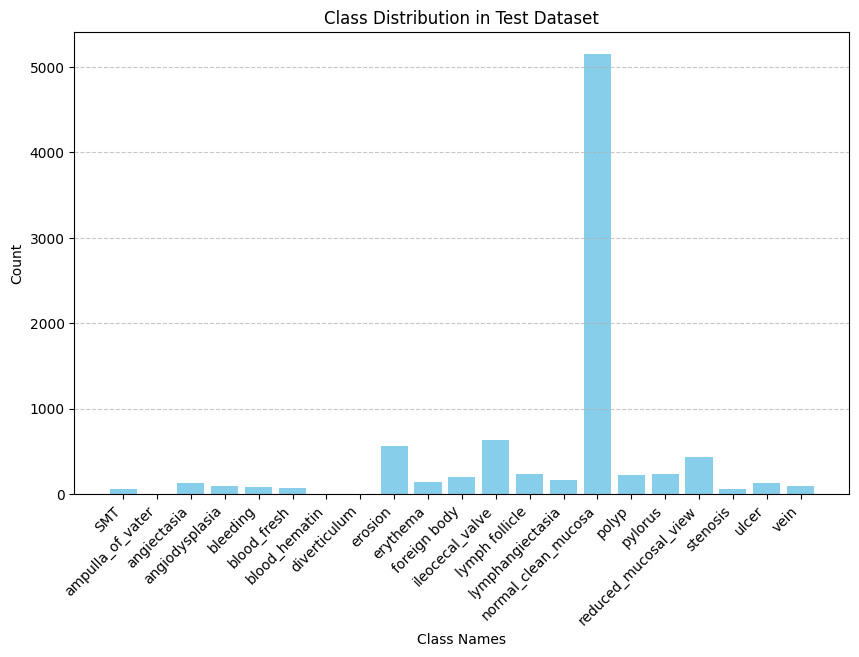

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the distribution of classes in the dataset as a bar graph.
    """
    # Get class counts
    class_counts = Counter(dataset.targets)  # dataset.targets contains class indices
    class_names = dataset.classes           # Class names
    counts = [class_counts[i] for i in range(len(class_names))]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, counts, color='skyblue')
    plt.xlabel("Class Names")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example Usage for Train Dataset
plot_class_distribution(train_dataset, title="Class Distribution in Training Dataset")

# Example Usage for Validation Dataset
plot_class_distribution(val_dataset, title="Class Distribution in Validation Dataset")

# Example Usage for Test Dataset
plot_class_distribution(test_dataset, title="Class Distribution in Test Dataset")


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

def predict_image(model, image_path, class_names):
    """
    Predicts the class of an image using the trained ViT model.
    Args:
        model: Trained Vision Transformer (ViT) model.
        image_path: Path to the input image.
        class_names: List of class names from the dataset.

    Returns:
        Predicted class and confidence.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize image to fit ViT input size
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Perform prediction
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        confidence, predicted_class = torch.max(probabilities, dim=0)

    # Output the results
    predicted_label = class_names[predicted_class]
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence.item():.4f}")

    return predicted_label, confidence.item()

# Example Usage
image_path = "/content/drive/MyDrive/Preprocessed_Test_CE/pylorus/04a78ef00c5245e0_11865.jpg"  # Replace with the path to your image
class_names = train_dataset.classes  # Class names from your dataset
predicted_label, confidence = predict_image(model, image_path, class_names)


Predicted Class: pylorus, Confidence: 0.7220
